Engy-5050 Spring 2025 UMass Lowell; Prof. V. F. de Almeida **26Apr2025**

# 02. Neutron Diffusion from a "Plane" Source
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\ihat}{\hat{\boldsymbol{i}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathcal{E}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Natural/Natural Boundary Conditions](#p1)
1. [Alternative Problem Statement](#p2)
1. [Galerkin's Method w/ Finite Element Basis Functions](#p3)
1. ["Plane Source in a Symmetric Infinite Domain"](#sym-case)
   + [Data](#data-sym)
   + [Finite Element Lagrange Basis Functions](#fembf-sym)
   + [Results](#results-sym)
1. ["Plane Source in an Unsymmetric Infinite Domain w/o Side Sources"](#unsym-case1)
   + [Data](#data-unsym1)
   + [Finite Element Lagrange Basis Functions](#fembf-unsym1)
   + [Results](#results-unsym1)
1. ["Plane Source in an Unsymmetric Infinite Domain w/ Left Side Source"](#unsym-case2)
   + [Data](#data-unsym2)
   + [Finite Element Lagrange Basis Functions](#fembf-unsym2)
   + [Results](#results-unsym2)
1. ["Plane Source" in a Finite Domain w/ Vacuum Boundary](#vac-case)
   + [Data](#data-vac)
   + [Finite Element Lagrange Basis Functions](#fembf-vac)
   + [Results](#results-vac)
---

## [Objectives](#toc)<a id="obj"></a>

 + Solve the 1-D, Cartesian coordinates, neutron diffusion from a plane source problem using multiple regions.

## [Boundary-Value Problem Statement](#toc)<a id="p1"></a>

Solve the heterogeneous spatial neutron flux magnitude diffusion problem. Find $u_1:[s,b]\subset\Reals\rightarrow\Reals$, $u_2:[-s,s]\subset\Reals\rightarrow\Reals$, $u_3:[a,-s]\subset\Reals\rightarrow\Reals$
such that:

\begin{align*}
 -\bigl(-D_1\, u_1'\bigr)'(x) - \Sigma_{a,1}\,u_1(x) + s_0^{(1)} &= 0 \quad\quad \forall \quad\quad x\in\ ]s,b[, \\
 -\bigl(-D_2\, u_2'\bigr)'(x) - \Sigma_{a,2}\,u_2(x) + s_0^{(2)} &= 0 \quad\quad \forall \quad\quad x\in\ ]-s,s[, \\
 -\bigl(-D_3\, u_3'\bigr)'(x) - \Sigma_{a,3}\,u_3(x) + s_0^{(3)} &= 0 \quad\quad \forall \quad\quad x\in\ ]a,-s[, \\
 q_{3,n}(a) &= q_{3,na}, \\
 q_{1,n}(b) &= q_{1,nb}, \\
 u_1(s) &= u_2(s), \\
 u_3(-s) &= u_2(-s), \\
 q_{1,n}(s) &= q_{2,n}(s), \\
 q_{3,n}(-s) &= q_{2,n}(-s), \\
\end{align*}
   
Given data: diffusion coefficients, $D$, macroscopic absorption cross sections, $\Sigma_a$, source $s_0$, boundary conditions of normal flux, and continuity conditions at the interfaces (both normal flux and solution). Where $q_{i,n}(x) = \flux_i(x)\cdot\normal(x) = -D_i\,u_i'(x)\,\ihat \cdot \normal(x) \ \forall \ i=1,2,3$.

## [Alternative Boundary-Value Problem Statement](#toc)<a id="p2"></a>

Solve the equivalent heterogeneous spatial neutron flux magnitude diffusion problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D(x)\, u'\bigr)'(x) - \Sigma_a(x)\,u(x) + s_0(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 q_n(a) &= q_{na}, \\
 q_n(b) &= q_{nb}, \\
\end{align*}
   
Given data: diffusion coefficient, $D(x)$, macroscopic absorption cross section, $\Sigma_a(x)$, source $s_0(x)$, and normal flux boundary conditions. Where $q_n(x) = \flux(x)\cdot\normal(x) = -D(x)\,u_i'(x)\,\ihat \cdot \normal(x)$.

## [Galerkin Method (or Rayleigh-Ritz) w/ Finite Element Basis Functions](#toc)<a id="p3"></a>

The Galerkin weak formulation is as follows. Find $u \in H^1\!\bigl([a,b]\bigr)$ so that 

\begin{align*}
\bigl(-D\, u',v'\bigr) - \bigl(\Sigma_a\,u,v\bigr) + \bigl(s_0,v\bigr) - q_n(a)\,v(a) - q_n(b)\,v(b) &= 0 \quad\quad \forall \quad\quad v \in H^1\!\bigl([a,b]\bigr), 
\end{align*}

where $H^1\!\bigl([a,b]\bigr) := \bigl\{ u:[a,b]\subset\Reals\rightarrow \Reals \mid \bigl(u',u'\bigr) + \bigl(u,u\bigr) < \infty\bigr\}$. Because $u$ and $v$ belong to the same space of functions, this variational form is called the Galerkin's variational form. Choosing a finite dimensional
subspace of $H^1\!\bigl([a,b]\bigr)$, say $V_N([a,b]) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \bigr\} \subset H^1\!\bigl([a,b]\bigr)$, where $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$, the coefficients $\cvec := \{c_i\mid i=1,\ldots,N\}$ can be computed by solving the linear system of algebraic equations

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $
  + $b_i = (s_0,\phi_i) - q_{na}\,\phi_i(a) - q_{nb}\,\phi_i(b)$
  
Note: this method is identical to the Rayleigh-Ritz method, therefore the approximate solution  $u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i$ is a minimizer of a particular norm (*i.e.* the energy norm).

## ["Plane Source in a Symmetric Infinte Domain"](#toc)<a id="sym-case"></a>

Consider a "thin" planar source surrounded by two identical material regions. The domains extend far away from source. 

The normal flux boundary conditions are as follows:

\begin{align*}
 q_n(\infty) &= 0, \\
 q_n(-\infty) &= 0.
\end{align*}

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter
unit.mm = unit.milli*unit.meter
unit.um = unit.micro*unit.meter

In [2]:
'''Domain'''
x_a = -80*unit.cm  # infinity
x_b = +80*unit.cm  # infinity
x_s = 0.5*unit.cm  # thickness of source (2*x_s)

In [3]:
'''Domain'''

def show_domain(x_a, x_s, x_b, zoom=3):
    import pyvista as pv
    pv.set_plot_theme('paraview')
    h = 25
    source = pv.Box((-x_s,x_s,-h*x_s,h*x_s,-h*x_s,h*x_s))
    mat_right = pv.Box((x_s,x_b,-h*x_s,h*x_s,-h*x_s,h*x_s))
    mat_left = pv.Box((x_a,-x_s,-h*x_s,h*x_s,-h*x_s,h*x_s))
    
    plo = pv.Plotter(notebook=True, shape=(1,1)) 
    plo.subplot(0,0)
    plo.add_mesh(source, color='red', opacity=1.0,)
    plo.add_mesh(mat_right, color='green', opacity=0.5)
    plo.add_mesh(mat_left, color='tan', opacity=0.5)
    plo.add_axes(xlabel='X', ylabel='Y', zlabel='Z')
    plo.screenshot('domain.png', window_size=(1000,400))
    plo.camera.zoom(zoom)
    cpos = plo.show(window_size=(1000, 400), auto_close=False)
    return plo

In [ ]:
plo = show_domain(x_a, x_s, x_b)

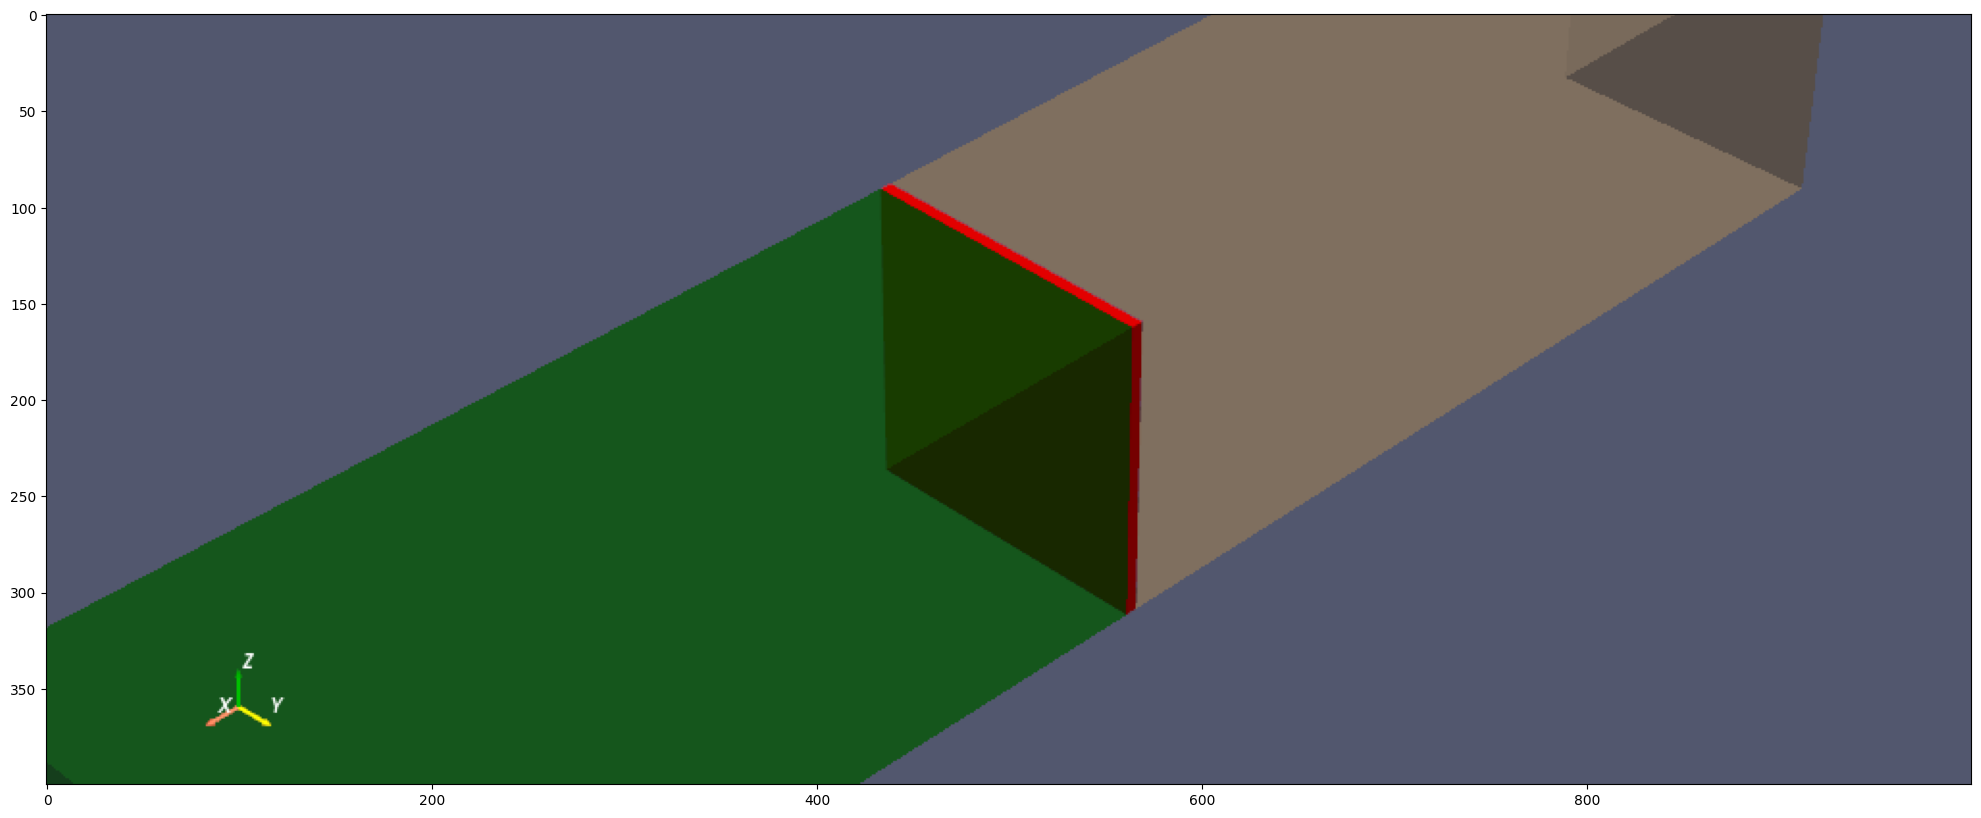

In [5]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data-sym"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $D_3$, $\Sigma_{a3}$, $s_{03}$
> + $q_{na}$, $q_{nb}$


In [6]:
'''Parameters and data'''

# Left side material
diffusion_coeff_3 = 1.0*unit.cm
sigma_a_3 = 0.01/unit.cm
source_3 = 0./unit.cm**3/unit.second

# Right side material
diffusion_coeff_1 = 1.0*unit.cm
sigma_a_1 = 0.01/unit.cm
source_1 = 0./unit.cm**3/unit.second

# Source
diffusion_coeff_2 = 1.5*unit.cm
sigma_a_2 = 0.005/unit.cm
source_2_two_prime = 1./unit.cm**2/unit.second # enforce a given surface source
length = 2*x_s
source_2 = source_2_two_prime/length

# Left normal flux
q_na = 0/unit.cm**2/unit.second
# Right normal flux
q_nb = 0/unit.cm**2/unit.second

In [7]:
print('s_2 [#/cm^3-s] = ', source_2*unit.cm**3*unit.second)

s_2 [#/cm^3-s] =  1.0000000000000002


In [8]:
'''Diffusion lengths'''

import math
diffusion_length_1 = math.sqrt(diffusion_coeff_1/sigma_a_1)
print('L1 [cm] = %2.3e'%(diffusion_length_1/unit.cm))
diffusion_length_2 = math.sqrt(diffusion_coeff_2/sigma_a_2)
print('L2 [cm] = %2.3e'%(diffusion_length_2/unit.cm))
diffusion_length_3 = math.sqrt(diffusion_coeff_3/sigma_a_3)
print('L3 [cm] = %2.3e'%(diffusion_length_3/unit.cm))

L1 [cm] = 1.000e+01
L2 [cm] = 1.732e+01
L3 [cm] = 1.000e+01


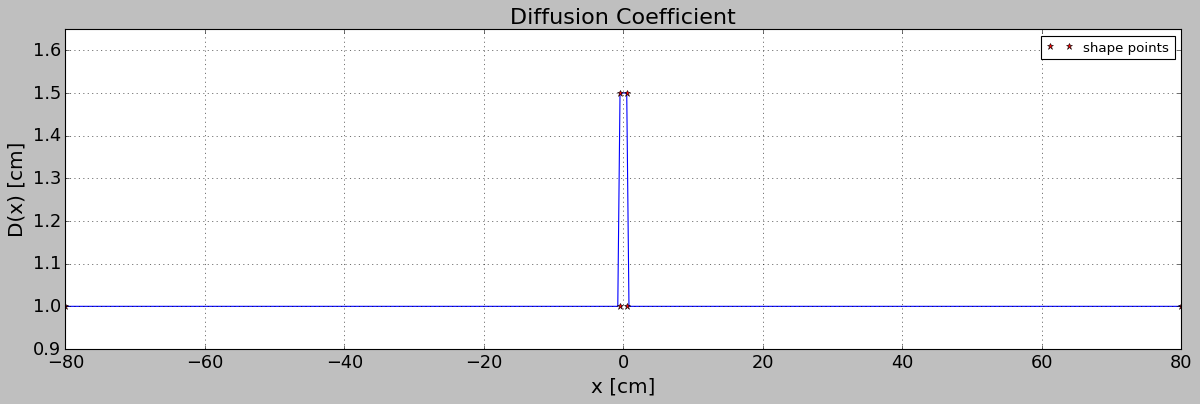

In [9]:
'''Diffusion coefficient function'''
from pyfem1d.toolkit import TargetFunction   

shape_pts = [(x_a, diffusion_coeff_3), (-x_s, diffusion_coeff_3), 
             (-x_s, diffusion_coeff_2), (x_s, diffusion_coeff_2), 
             (x_s, diffusion_coeff_1), (x_b, diffusion_coeff_1)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*1.1])

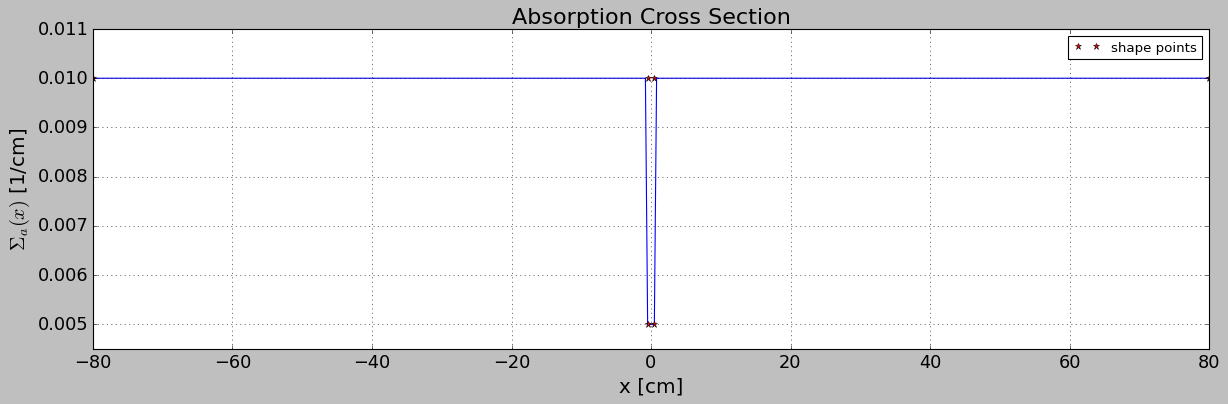

In [10]:
'''Absoption cross section function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_a_3), (-x_s, sigma_a_3), 
             (-x_s, sigma_a_2), (x_s, sigma_a_2), 
             (x_s, sigma_a_1), (x_b, sigma_a_1)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*1.1])

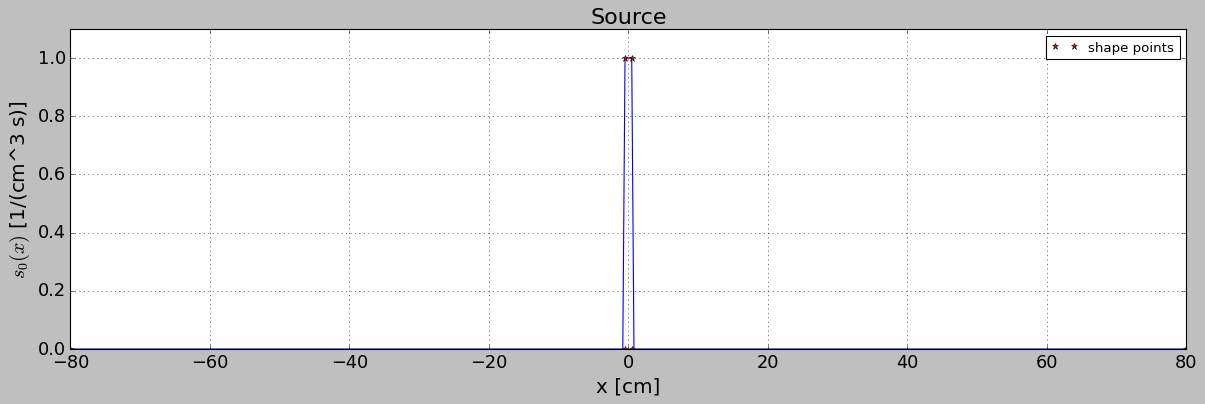

In [11]:
'''Source function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, source_3), (-x_s, source_3), 
             (-x_s, source_2), (x_s, source_2), 
             (x_s, source_1), (x_b, source_1)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2, source_3)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2, source_3)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-sym"></a>

Specify basis functions distribution on the material domain and degree.

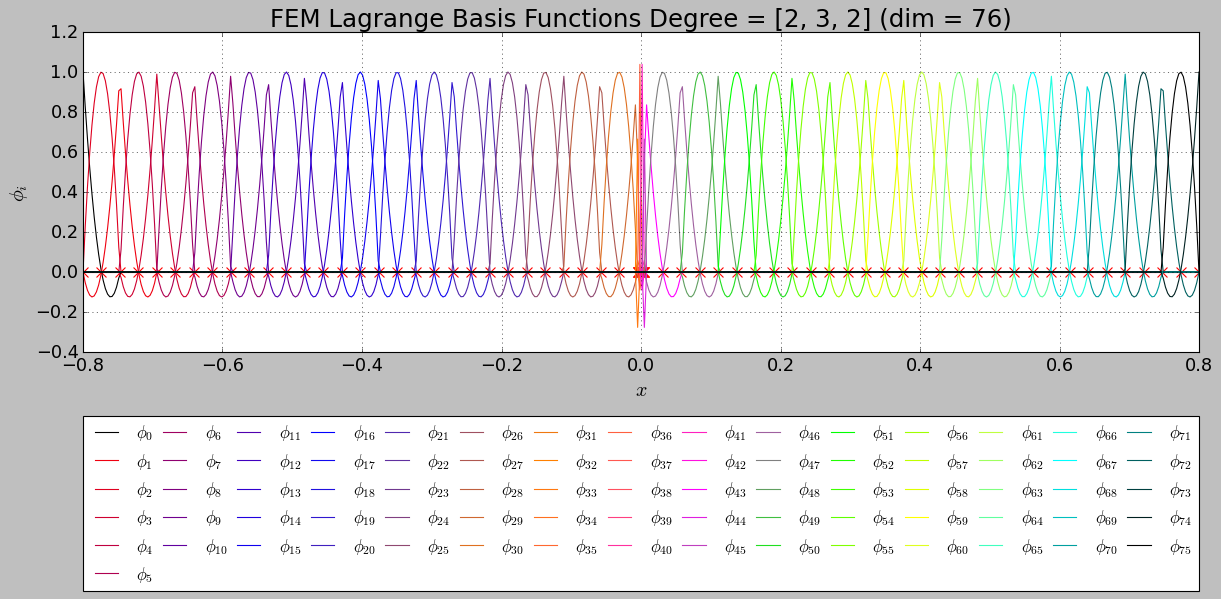

In [12]:
'''Build basis functions'''
from pyfem1d.toolkit import LagrangeFEMBasis 

degree = [2,3,2]
n_elem = [15,5,15] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, -x_s, x_s, x_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $

In [13]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'")
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx

In [14]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is full rank.


  + $b_i = (s_0,\phi_i) - q_{na}\,\phi_i(a) - q_{nb}\,\phi_i(b)$

In [18]:
'''Build the load vector'''

b_vec = femlb.inner_product_vector(source, 'v')
#b_vec -= femlb.boundary_inner_product_vector('left', lambda x: q_na, 'v')  # left side inner product is incorrect FIX (TODO)
b_vec -= femlb.boundary_inner_product_vector('right', lambda x: q_nb, 'v')

'''Build load vector (using global basis functions)'''
# left term correction
for i, phi_i in enumerate(femlb.basis_func_list):
    b_vec[i] -= q_na * phi_i(x_a)[0]

In [19]:
'''Compute coefficients of the finite element basis linear combination'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [20]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u = femlb.evaluation_matrix(x)@c_star_vec
    return u

In [21]:
'''Build the best approximation function in V_N'''

def u_prime_star(x):
    u_prime = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_prime

### [Results](#toc)<a id="results-sym"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

In [22]:
'''Plot solution'''

def plot_solution(x, u_values, q_values, 
                  u_legend='Solution w/ Neumann BC', 
                  q_legend='Flux w/ Neumann BC'):
    
    import matplotlib.pyplot as plt
    (fig, ax1) = plt.subplots(1, figsize=(14, 6))

    ax1.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label=u_legend)

    ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
    ax1.set_ylabel(r'$u_h(x)$', fontsize=18, color='red')
    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best', fontsize=12)
    #ax1.set_ylim(0,1)
    ax1.grid(True)

    # create a twin x axis to be shared
    ax2 = ax1.twinx()

    ax2.plot(x/unit.cm, q_values*unit.cm**2*unit.second, 'b-', label=q_legend)

    ax2.set_ylabel(r"$q_h(x)$", fontsize=18, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax2.legend(loc='center right', fontsize=12)
    #ax2.set_ylim(0,2)
    #ax2.grid(True)

    plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

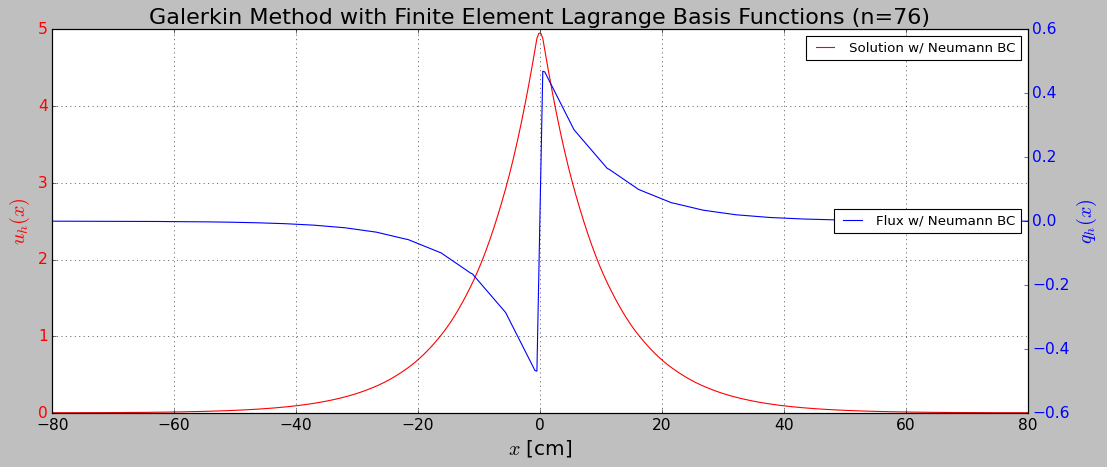

In [23]:
n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)
q_values = -diffusion_coeff(x)*u_prime_star(x)

plot_solution(x, u_values, q_values)

In [24]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) [cm^2/s]= ', u_star(x_a)*unit.cm**2*unit.second, '  u^*_N(b) [cm^2/s]= ', u_star(x_b)*unit.cm**2*unit.second)
print("u^*'_N(a) [cm/s]= ", u_prime_star(x_a)*unit.cm*unit.second, " u^*'_N(b) [cm/s]= ", u_prime_star(x_b)*unit.cm*unit.second)
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N(a) [cm^2/s]=  [0.00344]   u^*_N(b) [cm^2/s]=  [0.00344]
u^*'_N(a) [cm/s]=  [-0.0174]  u^*'_N(b) [cm/s]=  [0.0174]
u^*_N(0) [cm^2/s]=  [4.95775]
u^*'_N(0) [cm/s]=  [-1.49012e-10]


For an infinitesimally thin source (class notes), the limit obtained is $\phi_{1} (0) = \frac{s_0^"}{2}\,\frac{L_1}{D_1}$.

In [25]:
'''Error on u_1(0) for a thin source'''

phi_1_0 = source_2_two_prime/2*diffusion_length_1/diffusion_coeff_1
print('(u_star(0)-phi_1(0)) relative error [%]= ', abs(u_star(0)-phi_1_0)/phi_1_0*100)

(u_star(0)-phi_1(0)) relative error [%]=  [0.84504]


In [26]:
u_star(0)/phi_1_0

array([0.99155])

In [27]:
phi_1_0

50000.0

This shows how close the value of $u$ at the origin is to the limiting case of a thin source (class notes).

For an infinitesimally thin source, the limit obtained is $q_{1n}(0) =  \frac{s_0^"}{2}$.

In [28]:
'''Error on q_n1(0) for a thin source'''

q_1_n_0 = - source_2_two_prime/2
print('(q_1n(0)-q_1n_thin(0)) relative error [%]= ', abs(-(-diffusion_coeff_1*u_prime_star(0))-q_1_n_0)/q_1_n_0*100)

(q_1n(0)-q_1n_thin(0)) relative error [%]=  [-100.]


This shows how close the value of $q_{1n}$ at the origin is to the limiting case of a infinitesimally thin source (class notes). This limit cannot be reproduced because the 3-region problem solution is smooth (continuous derivative) for constant properties, while the infinitesimally thin source problem has a discontinuous derivative, hence the large error.

In [29]:
'''Flux at left boundary'''

print('q_na given    [cm2/s]= ', q_na)
print('q_na computed [cm2/s]= ', -(-diffusion_coeff(x_a)*u_prime_star(x_a))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_na given    [cm2/s]=  0.0
q_na computed [cm2/s]=  [-1.73963e-06]


In [30]:
'''Flux at right boundary'''

print('q_nb given    [cm^2/s]= ', q_nb)
print('q_nb computed [cm^2/s]= ', -diffusion_coeff(x_b)*u_prime_star(x_b)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [cm^2/s]=  0.0
q_nb computed [cm^2/s]=  [-1.73963e-06]


In [31]:
x_vec = np.linspace(x_a, x_b, 41)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
-8.00000e+01   +3.44102e-03     +1.73963e-06
-7.60000e+01   +3.72106e-03     -1.41763e-04
-7.20000e+01   +4.60197e-03     -3.09135e-04
-6.80000e+01   +6.22329e-03     -5.21304e-04
-6.40000e+01   +8.86611e-03     -7.95923e-04
-6.00000e+01   +1.29573e-02     -1.24969e-03
-5.60000e+01   +1.91215e-02     -1.90232e-03
-5.20000e+01   +2.83585e-02     -2.83266e-03
-4.80000e+01   +4.22495e-02     -4.11749e-03
-4.40000e+01   +6.30675e-02     -6.29149e-03
-4.00000e+01   +9.39699e-02     -9.49417e-03
-3.60000e+01   +1.39960e-01     -1.40956e-02
-3.20000e+01   +2.08868e-01     -2.04880e-02
-2.80000e+01   +3.12120e-01     -3.11375e-02
-2.40000e+01   +4.65296e-01     -4.70202e-02
-2.00000e+01   +6.93121e-01     -6.98935e-02
-1.60000e+01   +1.03419e+00     -1.01771e-01
-1.20000e+01   +1.54571e+00     -1.53987e-01
-8.00000e+00   +2.30463e+00     -2.32776e-01
-4.00000e+00   +3.43303e+00     -3.46480e-01
+0.00000e+00   +4.95775e+00     +2.23517e-14
+4.00000

In [32]:
x_vec

array([-0.8 , -0.76, -0.72, -0.68, -0.64, -0.6 , -0.56, -0.52, -0.48,
       -0.44, -0.4 , -0.36, -0.32, -0.28, -0.24, -0.2 , -0.16, -0.12,
       -0.08, -0.04,  0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,
        0.28,  0.32,  0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,
        0.64,  0.68,  0.72,  0.76,  0.8 ])

In [33]:
u_n_vec

array([3.44102e-03, 3.72106e-03, 4.60197e-03, 6.22329e-03, 8.86611e-03,
       1.29573e-02, 1.91215e-02, 2.83585e-02, 4.22495e-02, 6.30675e-02,
       9.39699e-02, 1.39960e-01, 2.08868e-01, 3.12120e-01, 4.65296e-01,
       6.93121e-01, 1.03419e+00, 1.54571e+00, 2.30463e+00, 3.43303e+00,
       4.95775e+00, 3.43303e+00, 2.30463e+00, 1.54571e+00, 1.03419e+00,
       6.93121e-01, 4.65296e-01, 3.12120e-01, 2.08868e-01, 1.39960e-01,
       9.39699e-02, 6.30675e-02, 4.22495e-02, 2.83585e-02, 1.91215e-02,
       1.29573e-02, 8.86611e-03, 6.22329e-03, 4.60197e-03, 3.72106e-03,
       3.44102e-03])

In [34]:
q_N_vec

array([ 1.73963e-06, -1.41763e-04, -3.09135e-04, -5.21304e-04,
       -7.95923e-04, -1.24969e-03, -1.90232e-03, -2.83266e-03,
       -4.11749e-03, -6.29149e-03, -9.49417e-03, -1.40956e-02,
       -2.04880e-02, -3.11375e-02, -4.70202e-02, -6.98935e-02,
       -1.01771e-01, -1.53987e-01, -2.32776e-01, -3.46480e-01,
        2.23517e-14,  3.46480e-01,  2.32776e-01,  1.53987e-01,
        1.01771e-01,  6.98935e-02,  4.70202e-02,  3.11375e-02,
        2.04880e-02,  1.40956e-02,  9.49417e-03,  6.29149e-03,
        4.11749e-03,  2.83266e-03,  1.90232e-03,  1.24969e-03,
        7.95923e-04,  5.21304e-04,  3.09135e-04,  1.41763e-04,
       -1.73963e-06])

In [35]:
'''Save text file with values'''

x_vec = np.linspace(x_a, x_b, 5000)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

np.savetxt('data/plane-source-sym-inf.txt', (x_vec/unit.cm, u_n_vec, q_N_vec), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('line-source-inf.txt')

## ["Plane Source in an Unsymmetric Infinite Domain w/o Side Sources"](#toc)<a id="unsym-case2"></a>

Consider a "thin" planar source surrounded by two different material regions. The domains extend far away from source. 

The normal flux boundary conditions are as follows:

\begin{align*}
 q_n(\infty) &= 0, \\
 q_n(-\infty) &= 0.
\end{align*}

In [36]:
'''Domain'''
x_a = -80*unit.cm  # infinity
x_b = +80*unit.cm  # infinity
x_s = 0.5*unit.cm  # thickness of source (2*x_s)

In [ ]:
plo = show_domain(x_a, x_s, x_b)

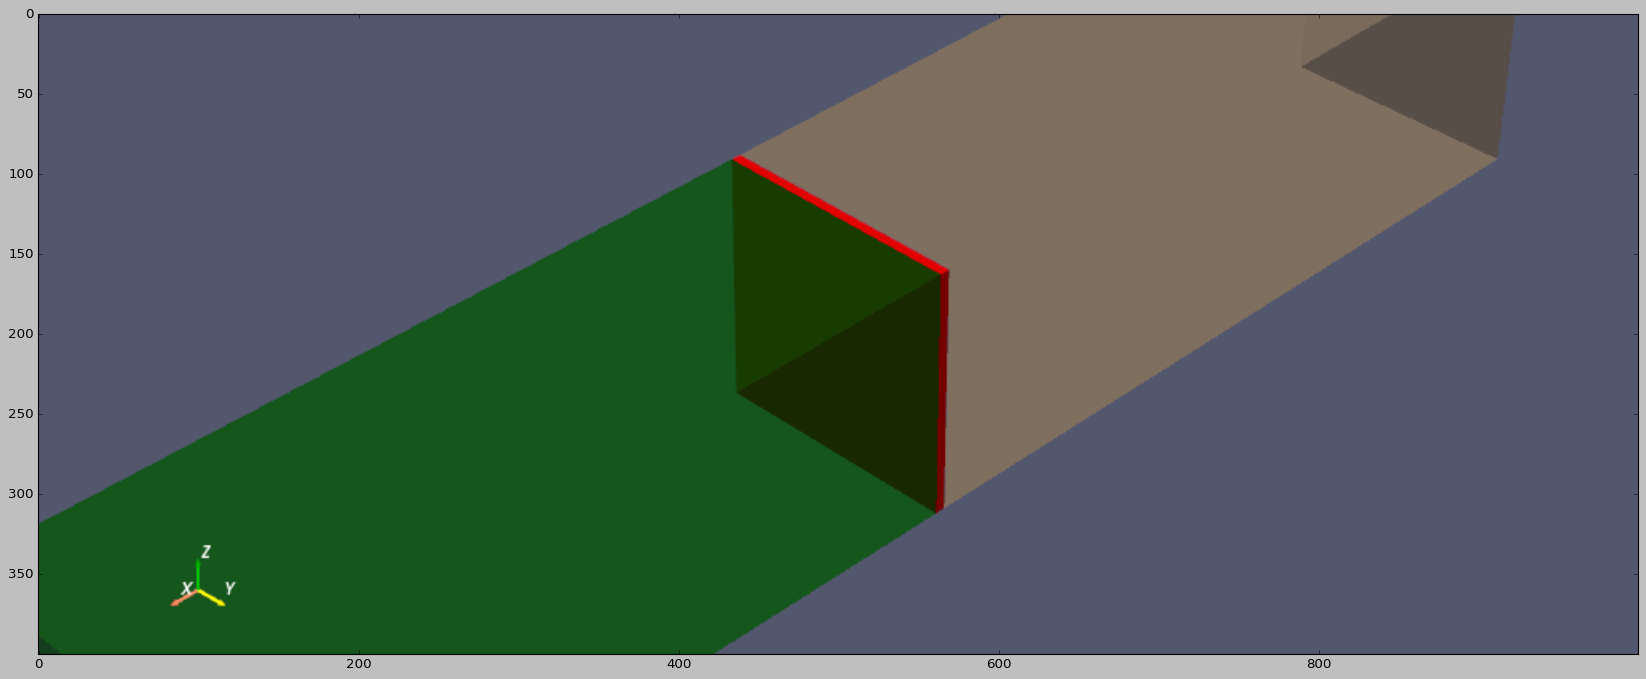

In [38]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data-unsym2"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $D_3$, $\Sigma_{a3}$, $s_{03}$
> + $q_{na}$, $q_{nb}$


In [39]:
'''Parameters and data'''

# Left side material
diffusion_coeff_3 = 1.0*unit.cm
sigma_a_3 = 0.04/unit.cm
source_3 = 0./unit.cm**3/unit.second

# Right side material
diffusion_coeff_1 = 1.4*unit.cm
sigma_a_1 = 0.01/unit.cm
source_1 = 0./unit.cm**3/unit.second

# Source
diffusion_coeff_2 = 1.5*unit.cm
sigma_a_2 = 0.005/unit.cm
source_2_two_prime = 1./unit.cm**2/unit.second # enforce a given surface source
length = 2*x_s
source_2 = source_2_two_prime/length

# Left normal flux
q_na = 0.0*unit.cm**2/unit.second
# Right normal flux
q_nb = 0.0*unit.cm**2/unit.second

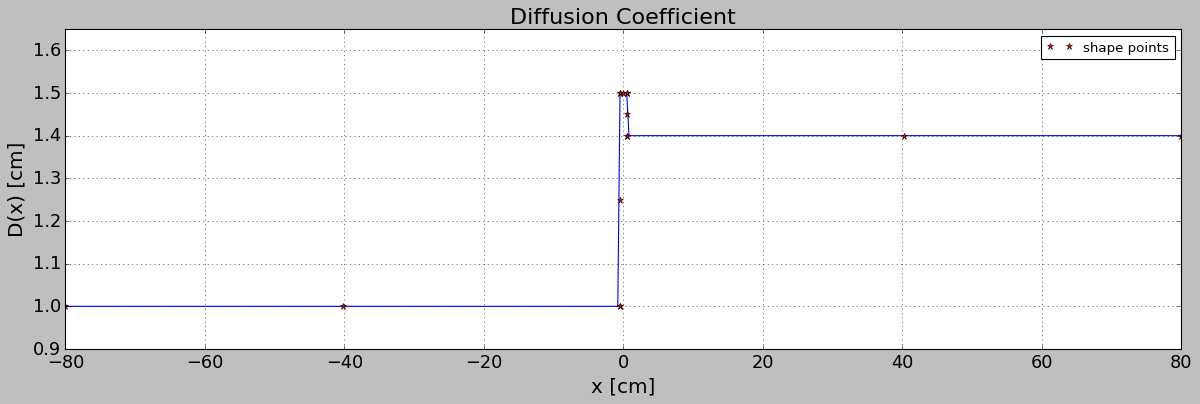

In [40]:
'''Diffusion coefficient function'''
from pyfem1d.toolkit import TargetFunction   

a = np.linspace(x_a, -x_s, 3)
a_pts = [(x, diffusion_coeff_3) for x in a]

b = np.linspace(diffusion_coeff_3, diffusion_coeff_2, 3)
b_pts = [(-x_s, y) for y in b]

c = np.linspace(-x_s, x_s, 3)
c_pts = [(x, diffusion_coeff_2) for x in c]

d = np.linspace(diffusion_coeff_2, diffusion_coeff_1, 3)
d_pts = [(x_s, y) for y in d]

e = np.linspace(x_s, x_b, 3)
e_pts = [(x, diffusion_coeff_1) for x in e]

shape_pts = a_pts + b_pts + c_pts + d_pts + e_pts

#shape_pts = [(x_a, diffusion_coeff_3), ((x_a-x_s)/2, diffusion_coeff_3),  (-x_s, diffusion_coeff_3), 
#             (-x_s, diffusion_coeff_2), (x_s, diffusion_coeff_2), 
#             (x_s, diffusion_coeff_1), (x_b, diffusion_coeff_1)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*1.1])

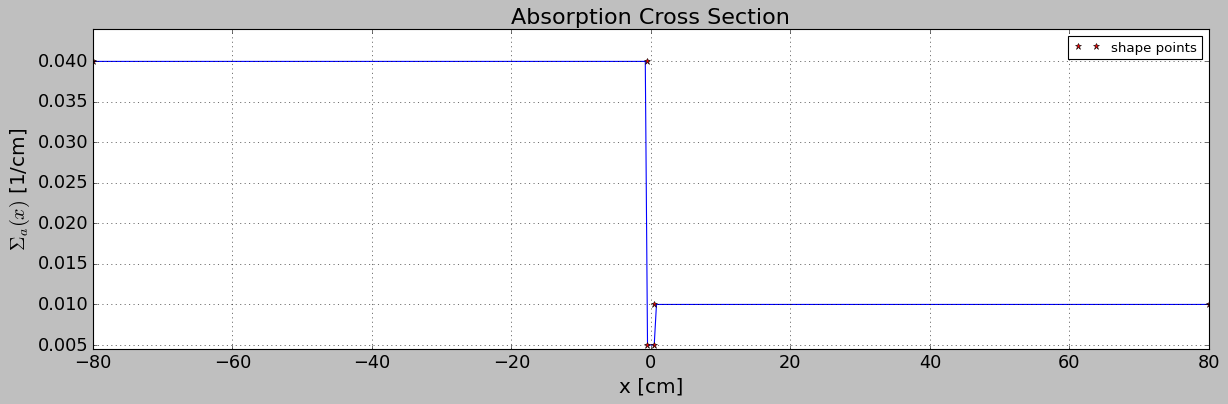

In [41]:
'''Absoption cross section function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_a_3), (-x_s, sigma_a_3), 
             (-x_s, sigma_a_2), (x_s, sigma_a_2), 
             (x_s, sigma_a_1), (x_b, sigma_a_1)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*1.1])

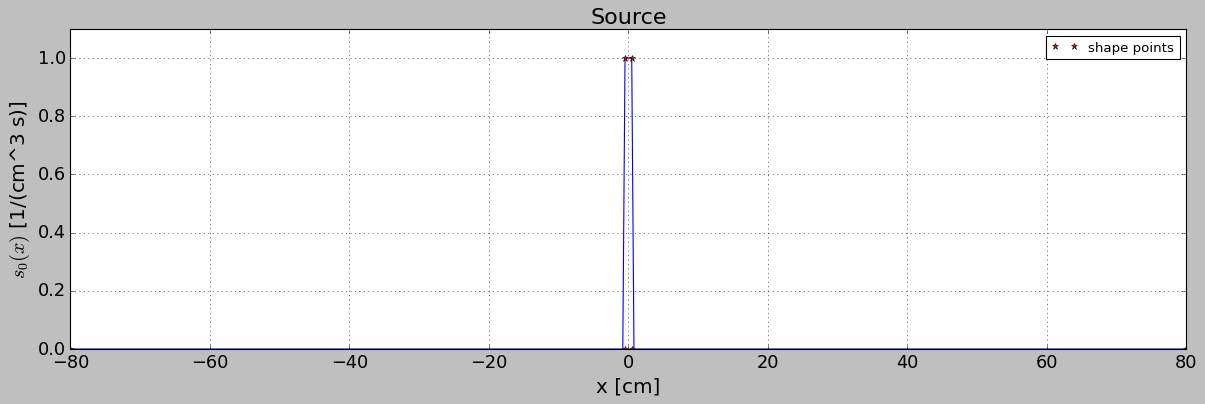

In [42]:
'''Source function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, source_3), (-x_s, source_3), 
             (-x_s, source_2), (x_s, source_2), 
             (x_s, source_1), (x_b, source_1)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2, source_3)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2, source_3)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-unsym2"></a>

Specify basis functions distribution on the material domain and degree.

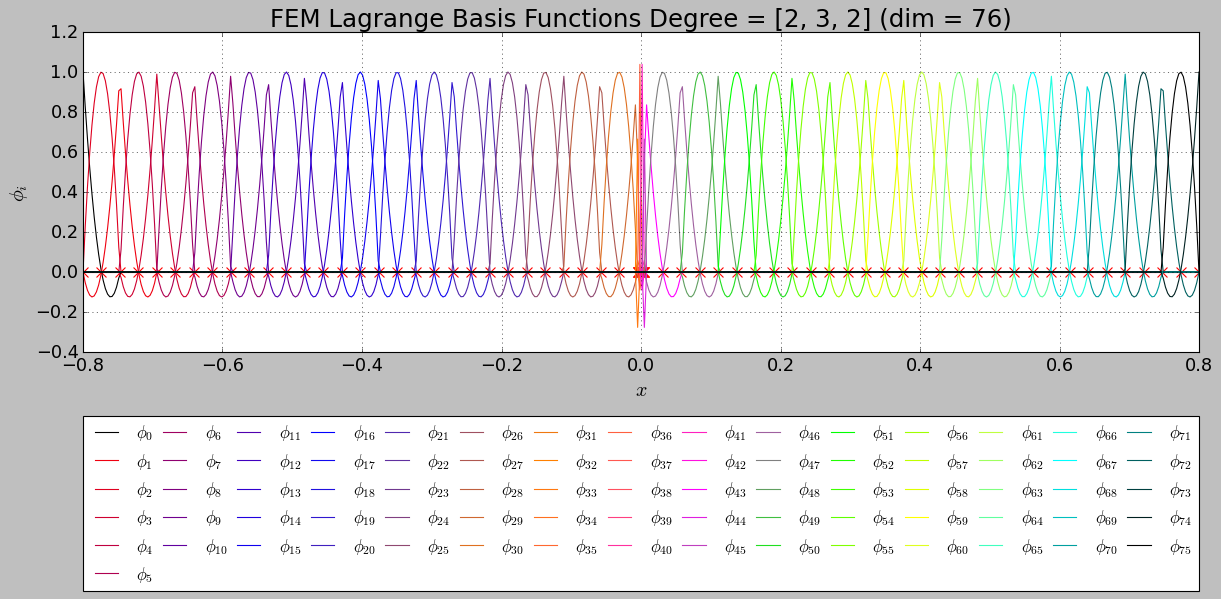

In [43]:
'''Build basis functions'''
from pyfem1d.toolkit import LagrangeFEMBasis 

degree = [2,3,2]
n_elem = [15,5,15] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, -x_s, x_s, x_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $

In [44]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'")
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx

In [45]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is full rank.


  + $b_i = (s_0,\phi_i) - q_{na}\,\phi_i(a) - q_{nb}\,\phi_i(b)$

In [ ]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v')
#qa_vec = femlb.boundary_inner_product_vector('left', lambda x: q_na, 'v')  # left side inner product is incorrect FIX (TODO)
qb_vec = femlb.boundary_inner_product_vector('right', lambda x: q_nb, 'v')

'''Build load vector (using global basis functions)'''
# Too slow (keep for information)
import numpy as np
n = len(femlb.basis_func_list)
b_vec = np.zeros(n, dtype=np.float64)
for i, phi_i in enumerate(femlb.basis_func_list):
    b_vec[i] = q_na * phi_i(x_a)[0]
    
#b_vec = s_vec - qa_vec - qb_vec
b_vec = s_vec - b_vec - qb_vec

In [46]:
'''Build the load vector'''

b_vec = femlb.inner_product_vector(source, 'v')
#b_vec -= femlb.boundary_inner_product_vector('left', lambda x: q_na, 'v')  # left side inner product is incorrect FIX (TODO)
b_vec -= femlb.boundary_inner_product_vector('right', lambda x: q_nb, 'v')

'''Build load vector (using global basis functions)'''
# left term correction
for i, phi_i in enumerate(femlb.basis_func_list):
    b_vec[i] -= q_na * phi_i(x_a)[0]

In [47]:
'''Compute coefficients of the finite element basis linear combination'''
import numpy as np

c_star_vec = np.linalg.solve(a_mtrx, b_vec)

### [Results](#toc)<a id="results-unsym2"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

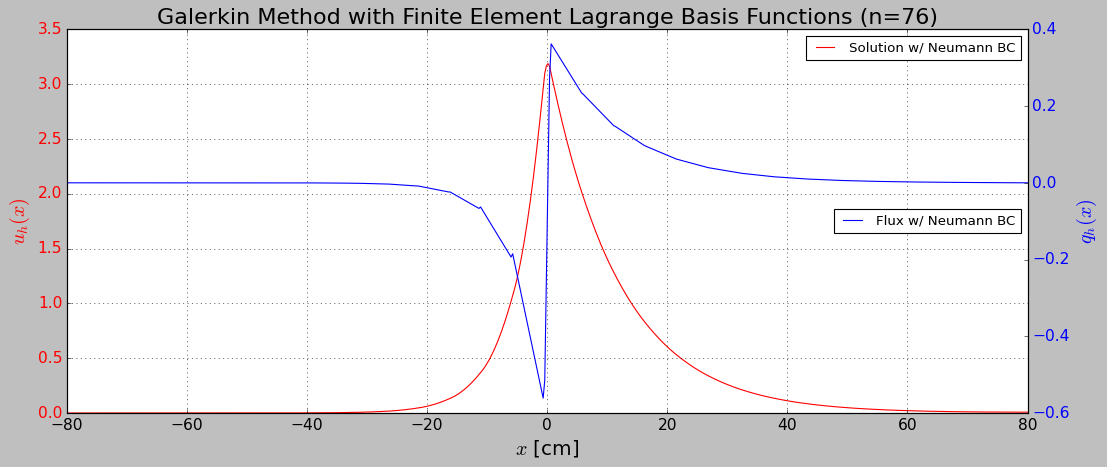

In [48]:
n_pts = 600
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)
q_values = -diffusion_coeff(x)*u_prime_star(x)

plot_solution(x, u_values, q_values)

In [49]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) [cm^2/s]= ', u_star(x_a)*unit.cm**2*unit.second, '  u^*_N(b) [cm^2/s]= ', u_star(x_b)*unit.cm**2*unit.second)
print("u^*'_N(a) [cm/s]= ", u_prime_star(x_a)*unit.cm*unit.second, " u^*'_N(b) [cm/s]= ", u_prime_star(x_b)*unit.cm*unit.second)
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N(a) [cm^2/s]=  [7.72598e-07]   u^*_N(b) [cm^2/s]=  [0.00759]
u^*'_N(a) [cm/s]=  [-6.59374e-05]  u^*'_N(b) [cm/s]=  [0.01947]
u^*_N(0) [cm^2/s]=  [3.18269]
u^*'_N(0) [cm/s]=  [802.83666]


In [50]:
'''Flux at left boundary'''

print('q_na given    [cm2/s]= ', q_na)
print('q_na computed [cm2/s]= ', -(-diffusion_coeff(x_a)*u_prime_star(x_a))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_na given    [cm2/s]=  0.0
q_na computed [cm2/s]=  [-6.59374e-09]


In [51]:
'''Flux at right boundary'''

print('q_nb given    [cm^2/s]= ', q_nb)
print('q_nb computed [cm^2/s]= ', -diffusion_coeff(x_b)*u_prime_star(x_b)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [cm^2/s]=  0.0
q_nb computed [cm^2/s]=  [-2.7258e-06]


In [52]:
x_vec = np.linspace(x_a, x_b, 41)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec/unit.cm, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
-8.00000e+01   +7.72598e-07     +6.59374e-09
-7.60000e+01   +1.03684e-06     -1.38717e-07
-7.20000e+01   +1.98774e-06     -3.83404e-07
-6.80000e+01   +4.23316e-06     -8.54007e-07
-6.40000e+01   +9.43867e-06     -1.63942e-06
-6.00000e+01   +2.11732e-05     -4.22782e-06
-5.60000e+01   +4.67585e-05     -9.77023e-06
-5.20000e+01   +1.02739e-04     -2.11840e-05
-4.80000e+01   +2.29937e-04     -4.09284e-05
-4.40000e+01   +5.17695e-04     -1.02950e-04
-4.00000e+01   +1.14465e-03     -2.38737e-04
-3.60000e+01   +2.51465e-03     -5.20804e-04
-3.20000e+01   +5.61292e-03     -1.01847e-03
-2.80000e+01   +1.26609e-02     -2.50550e-03
-2.40000e+01   +2.80217e-02     -5.83112e-03
-2.00000e+01   +6.15550e-02     -1.27958e-02
-1.60000e+01   +1.37061e-01     -2.53101e-02
-1.20000e+01   +3.09607e-01     -6.09628e-02
-8.00000e+00   +6.85955e-01     -1.42376e-01
-4.00000e+00   +1.50689e+00     -3.14203e-01
+0.00000e+00   +3.18269e+00     -1.20425e-01
+4.00000

In [53]:
x_vec

array([-0.8 , -0.76, -0.72, -0.68, -0.64, -0.6 , -0.56, -0.52, -0.48,
       -0.44, -0.4 , -0.36, -0.32, -0.28, -0.24, -0.2 , -0.16, -0.12,
       -0.08, -0.04,  0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,
        0.28,  0.32,  0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,
        0.64,  0.68,  0.72,  0.76,  0.8 ])

In [54]:
u_n_vec

array([7.72598e-07, 1.03684e-06, 1.98774e-06, 4.23316e-06, 9.43867e-06,
       2.11732e-05, 4.67585e-05, 1.02739e-04, 2.29937e-04, 5.17695e-04,
       1.14465e-03, 2.51465e-03, 5.61292e-03, 1.26609e-02, 2.80217e-02,
       6.15550e-02, 1.37061e-01, 3.09607e-01, 6.85955e-01, 1.50689e+00,
       3.18269e+00, 2.33520e+00, 1.66682e+00, 1.18911e+00, 8.47071e-01,
       6.04033e-01, 4.31158e-01, 3.07635e-01, 2.19194e-01, 1.56323e-01,
       1.11640e-01, 7.97449e-02, 5.69423e-02, 4.07665e-02, 2.93415e-02,
       2.12801e-02, 1.56471e-02, 1.18295e-02, 9.38965e-03, 8.02721e-03,
       7.58823e-03])

In [55]:
q_N_vec

array([ 6.59374e-09, -1.38717e-07, -3.83404e-07, -8.54007e-07,
       -1.63942e-06, -4.22782e-06, -9.77023e-06, -2.11840e-05,
       -4.09284e-05, -1.02950e-04, -2.38737e-04, -5.20804e-04,
       -1.01847e-03, -2.50550e-03, -5.83112e-03, -1.27958e-02,
       -2.53101e-02, -6.09628e-02, -1.42376e-01, -3.14203e-01,
       -1.20425e-01,  2.78092e-01,  1.98647e-01,  1.40318e-01,
        9.91116e-02,  7.18832e-02,  5.13954e-02,  3.63299e-02,
        2.55787e-02,  1.85698e-02,  1.32831e-02,  9.38708e-03,
        6.57476e-03,  4.75998e-03,  3.38093e-03,  2.35318e-03,
        1.58991e-03,  1.07776e-03,  6.59802e-04,  3.10009e-04,
       -2.72580e-06])

In [56]:
'''Save text file with values'''

x_vec = np.linspace(x_a, x_b, 5000)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

np.savetxt('data/plane-source-unsym1-inf.txt', (x_vec/unit.cm, u_n_vec, q_N_vec), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('plane-source-unsym1-inf.txt')

## ["Plane Source in an Unsymmetric Infinite Domain w/ Left Side Source"](#toc)<a id="unsym-case2"></a>

Consider a "thin" planar source surrounded by two different material regions. The domains extend far away from source. 

The normal flux boundary conditions are as follows:

\begin{align*}
 q_n(\infty) &= 0, \\
 q_n(-\infty) &= 0.
\end{align*}

In [57]:
'''Domain'''
x_a = -80*unit.cm  # infinity
x_b = +80*unit.cm  # infinity
x_s = 0.5*unit.cm  # thickness of source (2*x_s)

In [ ]:
plo = show_domain(x_a, x_s, x_b)

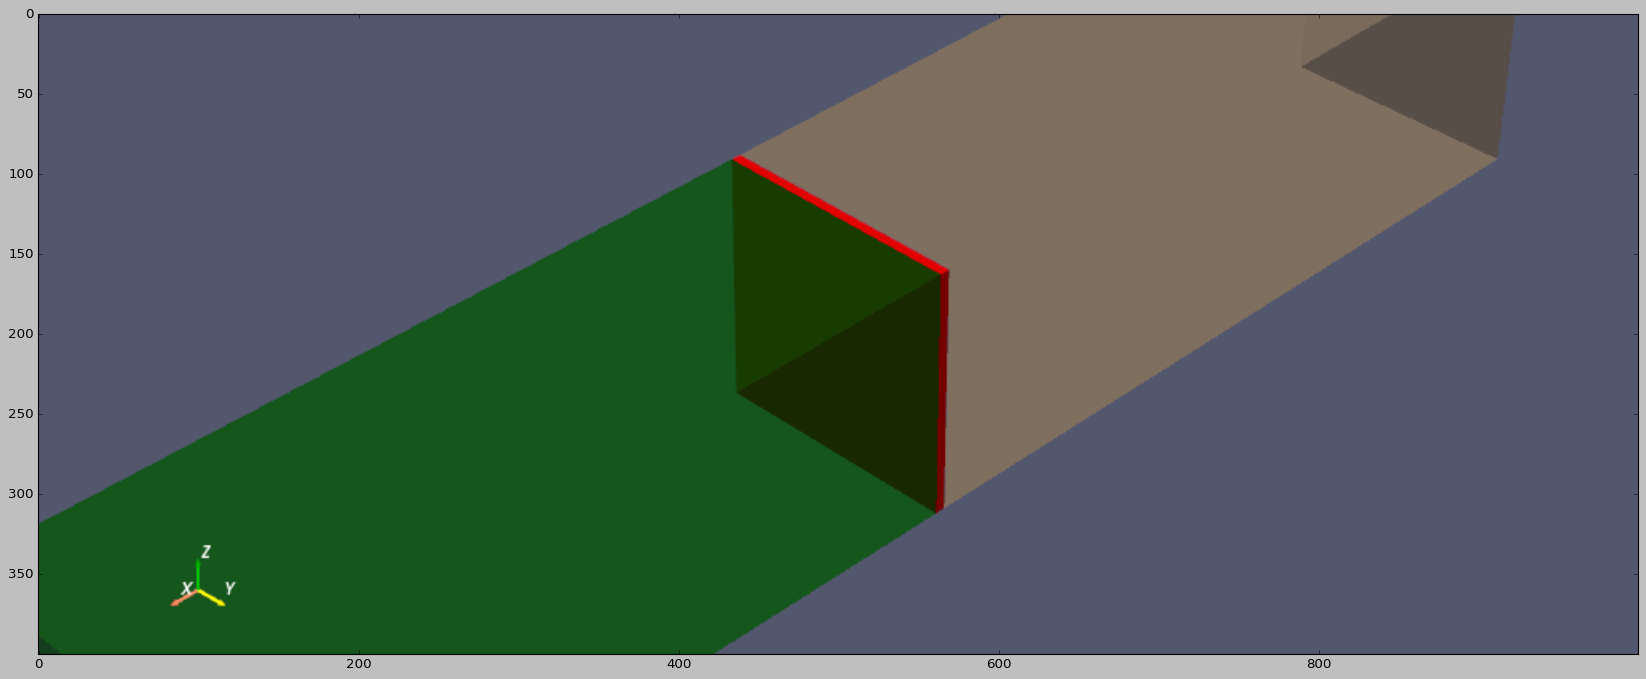

In [59]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data-unsym2"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $D_3$, $\Sigma_{a3}$, $s_{03}$
> + $q_{na}$, $q_{nb}$


In [60]:
'''Parameters and data'''

# Left side material
diffusion_coeff_3 = 1.0*unit.cm
sigma_a_3 = 0.04/unit.cm
source_3 = 0.1/unit.cm**3/unit.second

# Right side material
diffusion_coeff_1 = 1.4*unit.cm
sigma_a_1 = 0.01/unit.cm
source_1 = 0./unit.cm**3/unit.second

# Source
diffusion_coeff_2 = 1.5*unit.cm
sigma_a_2 = 0.005/unit.cm
source_2_two_prime = 1./unit.cm**2/unit.second # enforce a given surface source
length = 2*x_s
source_2 = source_2_two_prime/length

# Left normal flux
q_na = 0.0*unit.cm**2/unit.second
# Right normal flux
q_nb = 0.0*unit.cm**2/unit.second

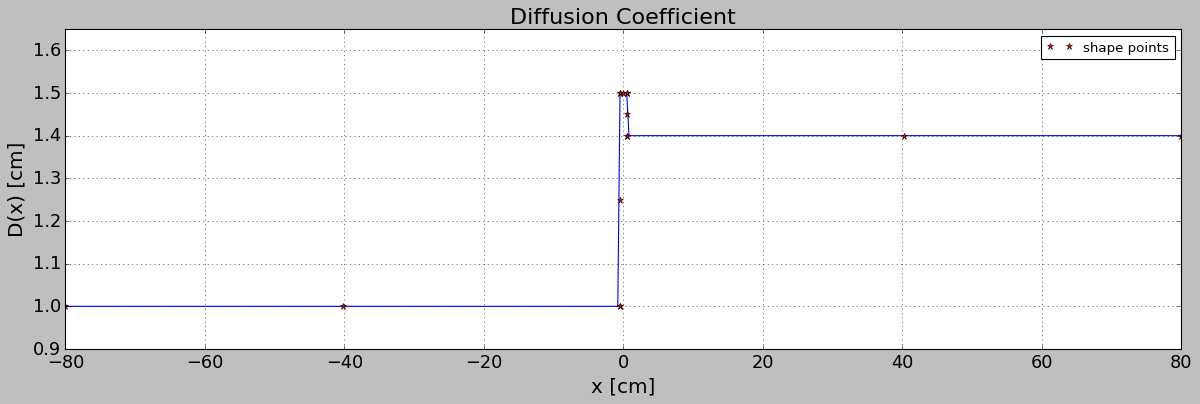

In [61]:
'''Diffusion coefficient function'''
from pyfem1d.toolkit import TargetFunction   

a = np.linspace(x_a, -x_s, 3)
a_pts = [(x, diffusion_coeff_3) for x in a]

b = np.linspace(diffusion_coeff_3, diffusion_coeff_2, 3)
b_pts = [(-x_s, y) for y in b]

c = np.linspace(-x_s, x_s, 3)
c_pts = [(x, diffusion_coeff_2) for x in c]

d = np.linspace(diffusion_coeff_2, diffusion_coeff_1, 3)
d_pts = [(x_s, y) for y in d]

e = np.linspace(x_s, x_b, 3)
e_pts = [(x, diffusion_coeff_1) for x in e]

shape_pts = a_pts + b_pts + c_pts + d_pts + e_pts

#shape_pts = [(x_a, diffusion_coeff_3), ((x_a-x_s)/2, diffusion_coeff_3),  (-x_s, diffusion_coeff_3), 
#             (-x_s, diffusion_coeff_2), (x_s, diffusion_coeff_2), 
#             (x_s, diffusion_coeff_1), (x_b, diffusion_coeff_1)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*1.1])

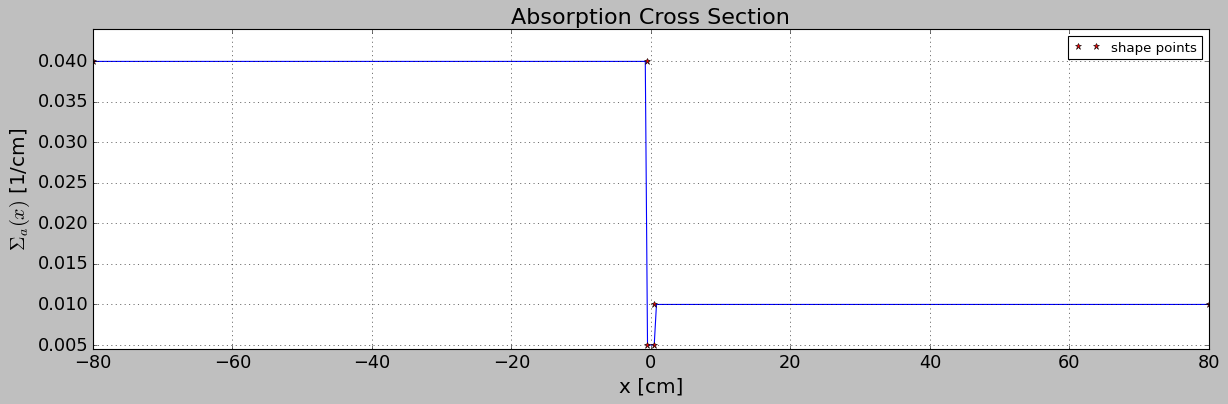

In [62]:
'''Absoption cross section function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_a_3), (-x_s, sigma_a_3), 
             (-x_s, sigma_a_2), (x_s, sigma_a_2), 
             (x_s, sigma_a_1), (x_b, sigma_a_1)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*1.1])

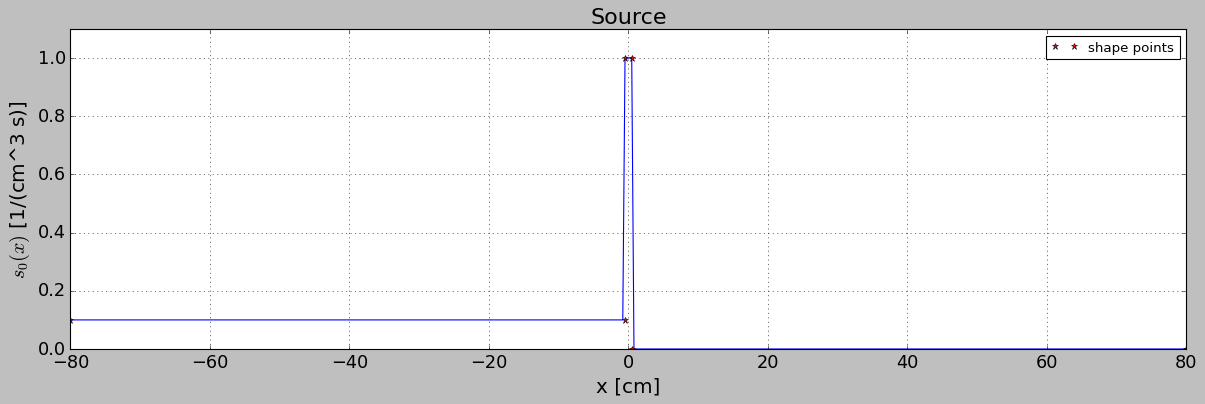

In [63]:
'''Source function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, source_3), (-x_s, source_3), 
             (-x_s, source_2), (x_s, source_2), 
             (x_s, source_1), (x_b, source_1)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2, source_3)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2, source_3)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-unsym2"></a>

Specify basis functions distribution on the material domain and degree.

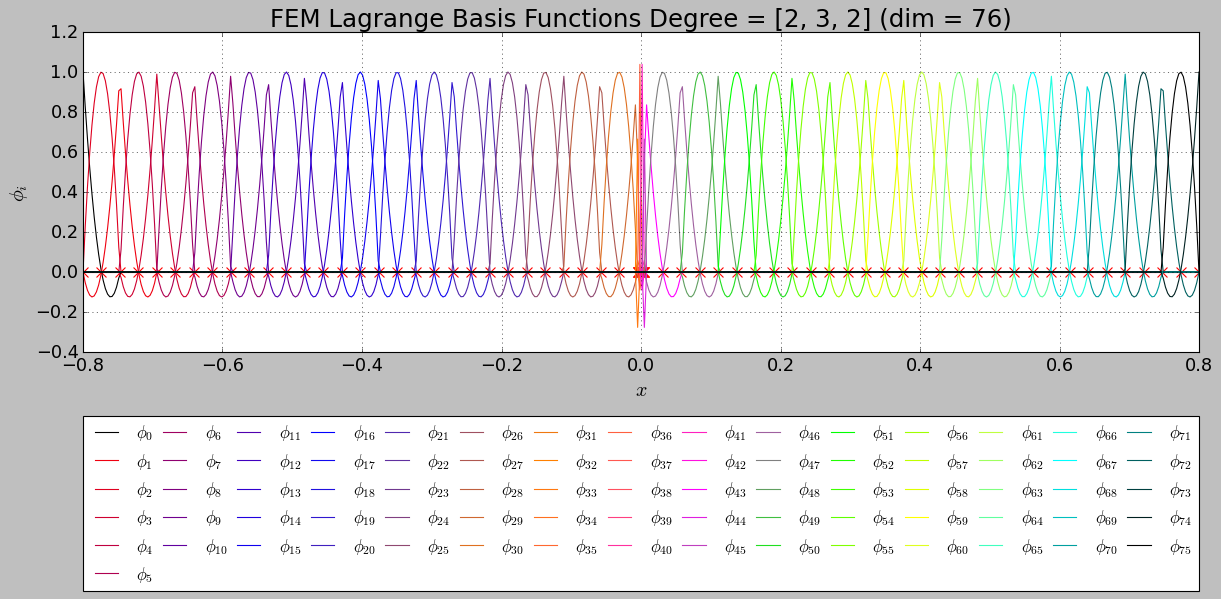

In [64]:
'''Build basis functions'''
from pyfem1d.toolkit import LagrangeFEMBasis 

degree = [2,3,2]
n_elem = [15,5,15] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, -x_s, x_s, x_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $

In [65]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'")
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx

In [66]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is full rank.


  + $b_i = (s_0,\phi_i) - q_{na}\,\phi_i(a) - q_{nb}\,\phi_i(b)$

In [ ]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v')
#qa_vec = femlb.boundary_inner_product_vector('left', lambda x: q_na, 'v')  # left side inner product is incorrect FIX (TODO)
qb_vec = femlb.boundary_inner_product_vector('right', lambda x: q_nb, 'v')

'''Build load vector (using global basis functions)'''
# Too slow (keep for information)
import numpy as np
n = len(femlb.basis_func_list)
b_vec = np.zeros(n, dtype=np.float64)
for i, phi_i in enumerate(femlb.basis_func_list):
    b_vec[i] = q_na * phi_i(x_a)[0]
    
#b_vec = s_vec - qa_vec - qb_vec
b_vec = s_vec - b_vec - qb_vec

In [67]:
'''Build the load vector'''

b_vec = femlb.inner_product_vector(source, 'v')
#b_vec -= femlb.boundary_inner_product_vector('left', lambda x: q_na, 'v')  # left side inner product is incorrect FIX (TODO)
b_vec -= femlb.boundary_inner_product_vector('right', lambda x: q_nb, 'v')

'''Build load vector (using global basis functions)'''
# left term correction
for i, phi_i in enumerate(femlb.basis_func_list):
    b_vec[i] -= q_na * phi_i(x_a)[0]

In [68]:
'''Compute coefficients of the finite element basis linear combination'''
import numpy as np

c_star_vec = np.linalg.solve(a_mtrx, b_vec)

### [Results](#toc)<a id="results-unsym2"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

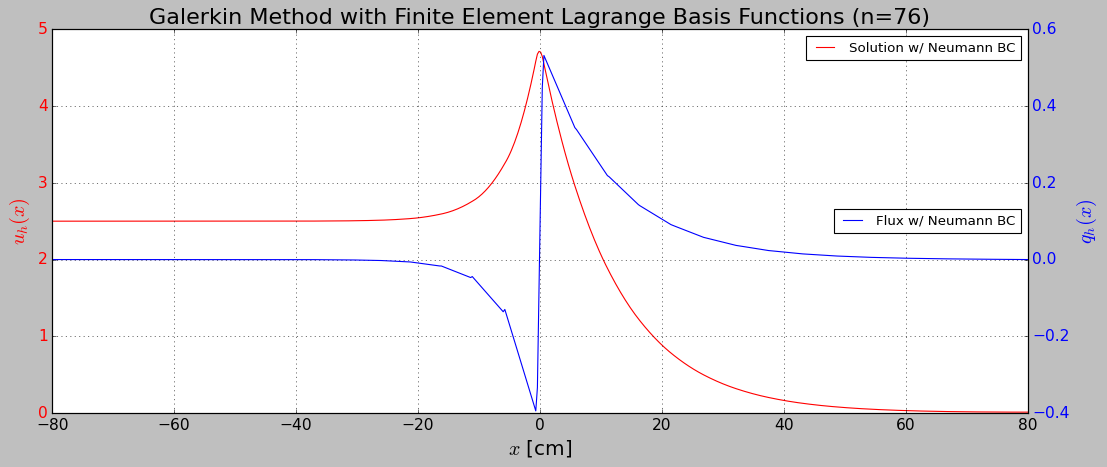

In [69]:
n_pts = 600
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)
q_values = -diffusion_coeff(x)*u_prime_star(x)

plot_solution(x, u_values, q_values)

In [70]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) [cm^2/s]= ', u_star(x_a)*unit.cm**2*unit.second, '  u^*_N(b) [cm^2/s]= ', u_star(x_b)*unit.cm**2*unit.second)
print("u^*'_N(a) [cm/s]= ", u_prime_star(x_a)*unit.cm*unit.second, " u^*'_N(b) [cm/s]= ", u_prime_star(x_b)*unit.cm*unit.second)
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N(a) [cm^2/s]=  [2.5]   u^*_N(b) [cm^2/s]=  [0.01115]
u^*'_N(a) [cm/s]=  [-4.63585e-05]  u^*'_N(b) [cm/s]=  [0.0286]
u^*_N(0) [cm^2/s]=  [4.71394]
u^*'_N(0) [cm/s]=  [-383.78819]


In [71]:
'''Flux at left boundary'''

print('q_na given    [cm2/s]= ', q_na)
print('q_na computed [cm2/s]= ', -(-diffusion_coeff(x_a)*u_prime_star(x_a))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_na given    [cm2/s]=  0.0
q_na computed [cm2/s]=  [-4.63585e-09]


In [72]:
'''Flux at right boundary'''

print('q_nb given    [cm^2/s]= ', q_nb)
print('q_nb computed [cm^2/s]= ', -diffusion_coeff(x_b)*u_prime_star(x_b)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [cm^2/s]=  0.0
q_nb computed [cm^2/s]=  [-4.00377e-06]


In [73]:
x_vec = np.linspace(x_a, x_b, 41)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec/unit.cm, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
-8.00000e+01   +2.50000e+00     +4.63585e-09
-7.60000e+01   +2.50000e+00     -9.75274e-08
-7.20000e+01   +2.50000e+00     -2.69559e-07
-6.80000e+01   +2.50000e+00     -6.00425e-07
-6.40000e+01   +2.50001e+00     -1.15262e-06
-6.00000e+01   +2.50001e+00     -2.97245e-06
-5.60000e+01   +2.50003e+00     -6.86914e-06
-5.20000e+01   +2.50007e+00     -1.48938e-05
-4.80000e+01   +2.50016e+00     -2.87755e-05
-4.40000e+01   +2.50036e+00     -7.23810e-05
-4.00000e+01   +2.50080e+00     -1.67848e-04
-3.60000e+01   +2.50177e+00     -3.66161e-04
-3.20000e+01   +2.50395e+00     -7.16056e-04
-2.80000e+01   +2.50890e+00     -1.76154e-03
-2.40000e+01   +2.51970e+00     -4.09968e-03
-2.00000e+01   +2.54328e+00     -8.99636e-03
-1.60000e+01   +2.59636e+00     -1.77947e-02
-1.20000e+01   +2.71767e+00     -4.28610e-02
-8.00000e+00   +2.98227e+00     -1.00100e-01
-4.00000e+00   +3.55944e+00     -2.20906e-01
+0.00000e+00   +4.71394e+00     +5.75682e-02
+4.00000

In [74]:
x_vec

array([-0.8 , -0.76, -0.72, -0.68, -0.64, -0.6 , -0.56, -0.52, -0.48,
       -0.44, -0.4 , -0.36, -0.32, -0.28, -0.24, -0.2 , -0.16, -0.12,
       -0.08, -0.04,  0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,
        0.28,  0.32,  0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,
        0.64,  0.68,  0.72,  0.76,  0.8 ])

In [75]:
u_n_vec

array([2.5    , 2.5    , 2.5    , 2.5    , 2.50001, 2.50001, 2.50003,
       2.50007, 2.50016, 2.50036, 2.5008 , 2.50177, 2.50395, 2.5089 ,
       2.5197 , 2.54328, 2.59636, 2.71767, 2.98227, 3.55944, 4.71394,
       3.43004, 2.4483 , 1.74662, 1.24422, 0.88723, 0.6333 , 0.45187,
       0.32196, 0.22961, 0.16398, 0.11713, 0.08364, 0.05988, 0.0431 ,
       0.03126, 0.02298, 0.01738, 0.01379, 0.01179, 0.01115])

In [76]:
q_N_vec

array([ 4.63585e-09, -9.75274e-08, -2.69559e-07, -6.00425e-07,
       -1.15262e-06, -2.97245e-06, -6.86914e-06, -1.48938e-05,
       -2.87755e-05, -7.23810e-05, -1.67848e-04, -3.66161e-04,
       -7.16056e-04, -1.76154e-03, -4.09968e-03, -8.99636e-03,
       -1.77947e-02, -4.28610e-02, -1.00100e-01, -2.20906e-01,
        5.75682e-02,  4.08473e-01,  2.91781e-01,  2.06105e-01,
        1.45579e-01,  1.05585e-01,  7.54919e-02,  5.33629e-02,
        3.75711e-02,  2.72761e-02,  1.95108e-02,  1.37882e-02,
        9.65729e-03,  6.99167e-03,  4.96606e-03,  3.45646e-03,
        2.33533e-03,  1.58307e-03,  9.69146e-04,  4.55355e-04,
       -4.00377e-06])

In [77]:
'''Save text file with values'''

x_vec = np.linspace(x_a, x_b, 5000)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

np.savetxt('data/plane-source-unsym2-inf.txt', (x_vec/unit.cm, u_n_vec, q_N_vec), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('line-source-inf.txt')

## ["Plane Source" in a Finite Domain w/ Vacuum Boundary](#toc)<a id="vac-case"></a>

Consider a source with finite thickness surrounded by two different material regions exposed to vacuum. 

The normal flux boundary conditions are as follows:

\begin{align*}
 q_n(a) &= \frac{u}{2}, \\
 q_n(b) &= \frac{u}{2}.
\end{align*}

In [78]:
'''Domain'''
x_a = -25*unit.cm  # infinity
x_b = +25*unit.cm  # infinity
x_s = 0.5*unit.cm  # thickness of source (2*x_s)

In [ ]:
plo = show_domain(x_a, x_s, x_b, zoom=1.5)

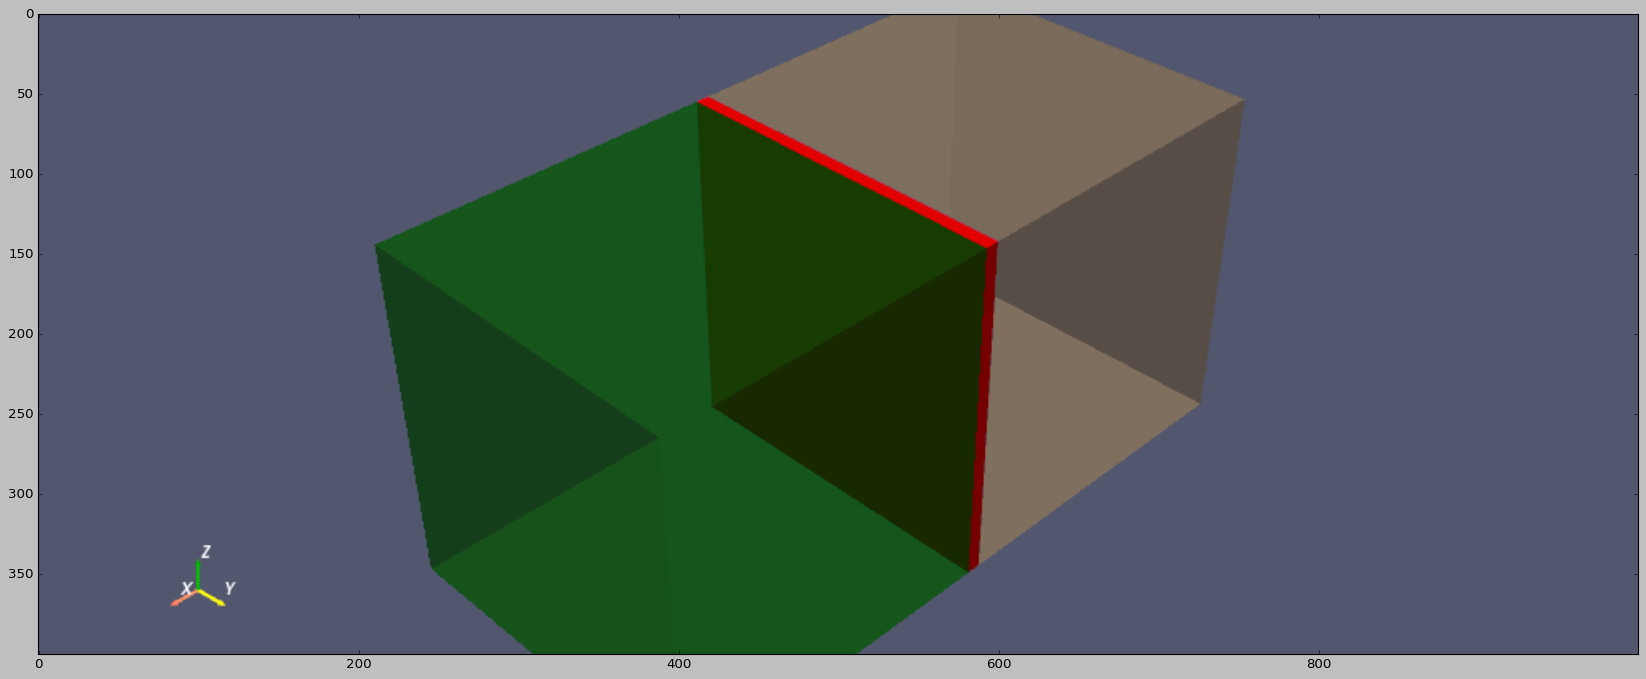

In [80]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data-vac"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $D_3$, $\Sigma_{a3}$, $s_{03}$


In [81]:
'''Parameters and data'''

# Left side material
diffusion_coeff_3 = 1.0*unit.cm
sigma_a_3 = 0.04/unit.cm
source_3 = 0.1/unit.cm**3/unit.second

# Right side material
diffusion_coeff_1 = 1.4*unit.cm
sigma_a_1 = 0.01/unit.cm
source_1 = 0./unit.cm**3/unit.second

# Source
diffusion_coeff_2 = 1.5*unit.cm
sigma_a_2 = 0.005/unit.cm
source_2_two_prime = 1./unit.cm**2/unit.second # enforce a given surface source
length = 2*x_s
source_2 = source_2_two_prime/length

In [82]:
print('s_2 [#/cm^3-s] = ', source_2*unit.cm**3*unit.second)

s_2 [#/cm^3-s] =  1.0000000000000002


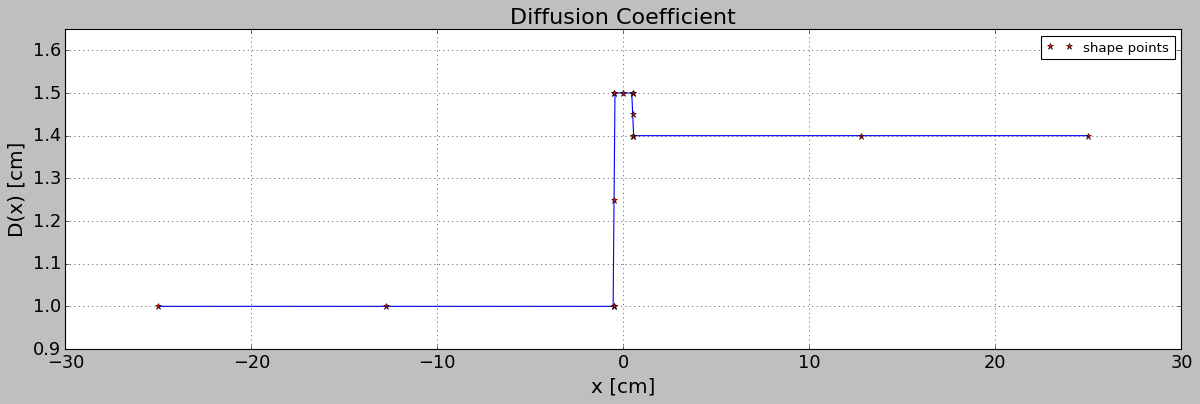

In [83]:
'''Diffusion coefficient function'''
from pyfem1d.toolkit import TargetFunction   

a = np.linspace(x_a, -x_s, 3)
a_pts = [(x, diffusion_coeff_3) for x in a]

b = np.linspace(diffusion_coeff_3, diffusion_coeff_2, 3)
b_pts = [(-x_s, y) for y in b]

c = np.linspace(-x_s, x_s, 3)
c_pts = [(x, diffusion_coeff_2) for x in c]

d = np.linspace(diffusion_coeff_2, diffusion_coeff_1, 3)
d_pts = [(x_s, y) for y in d]

e = np.linspace(x_s, x_b, 3)
e_pts = [(x, diffusion_coeff_1) for x in e]

shape_pts = a_pts + b_pts + c_pts + d_pts + e_pts

#shape_pts = [(x_a, diffusion_coeff_3), ((x_a-x_s)/2, diffusion_coeff_3),  (-x_s, diffusion_coeff_3), 
#             (-x_s, diffusion_coeff_2), (x_s, diffusion_coeff_2), 
#             (x_s, diffusion_coeff_1), (x_b, diffusion_coeff_1)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2, diffusion_coeff_3)/unit.cm*1.1])

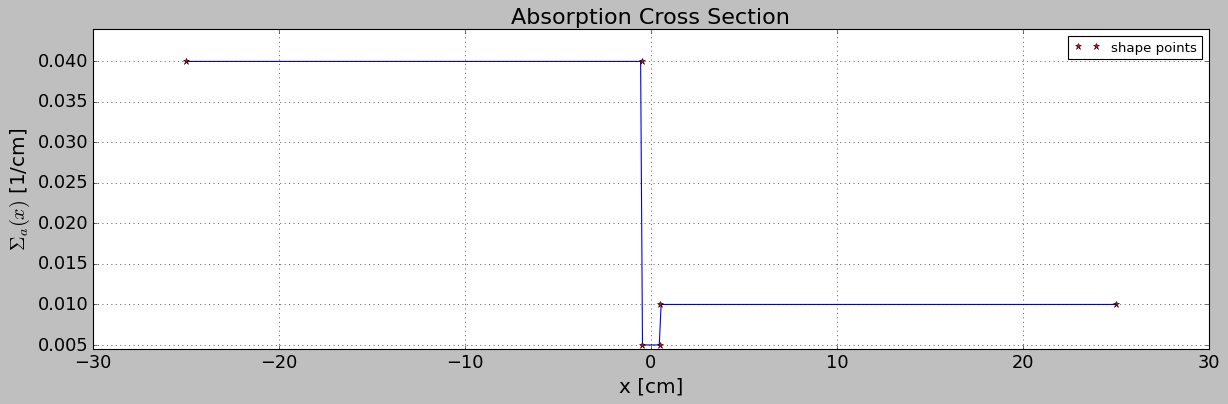

In [84]:
'''Absoption cross section function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, sigma_a_3), (-x_s, sigma_a_3), 
             (-x_s, sigma_a_2), (x_s, sigma_a_2), 
             (x_s, sigma_a_1), (x_b, sigma_a_1)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2, sigma_a_3)*unit.cm*1.1])

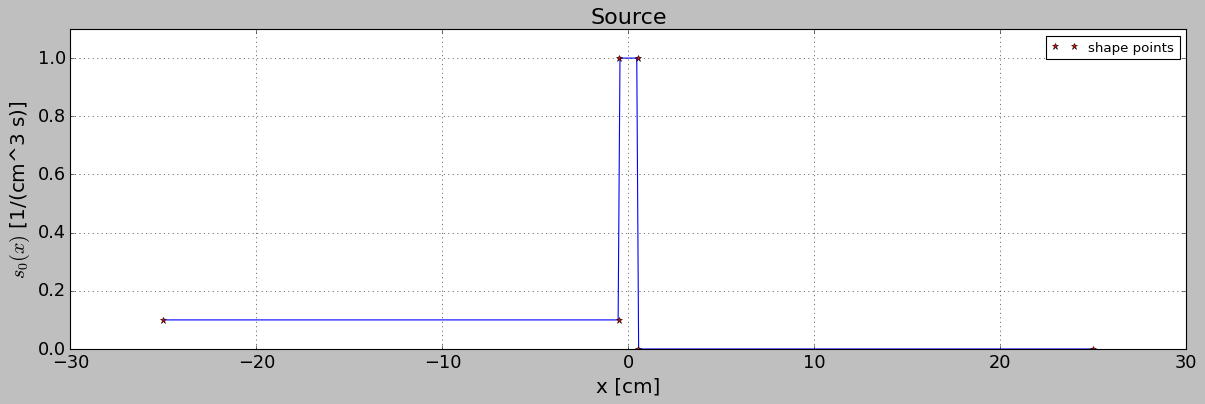

In [85]:
'''Source function'''
from pyfem1d.toolkit import TargetFunction  

shape_pts = [(x_a, source_3), (-x_s, source_3), 
             (-x_s, source_2), (x_s, source_2), 
             (x_s, source_1), (x_b, source_1)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2, source_3)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2, source_3)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf-vac"></a>

Specify basis functions distribution on the material domain and degree.

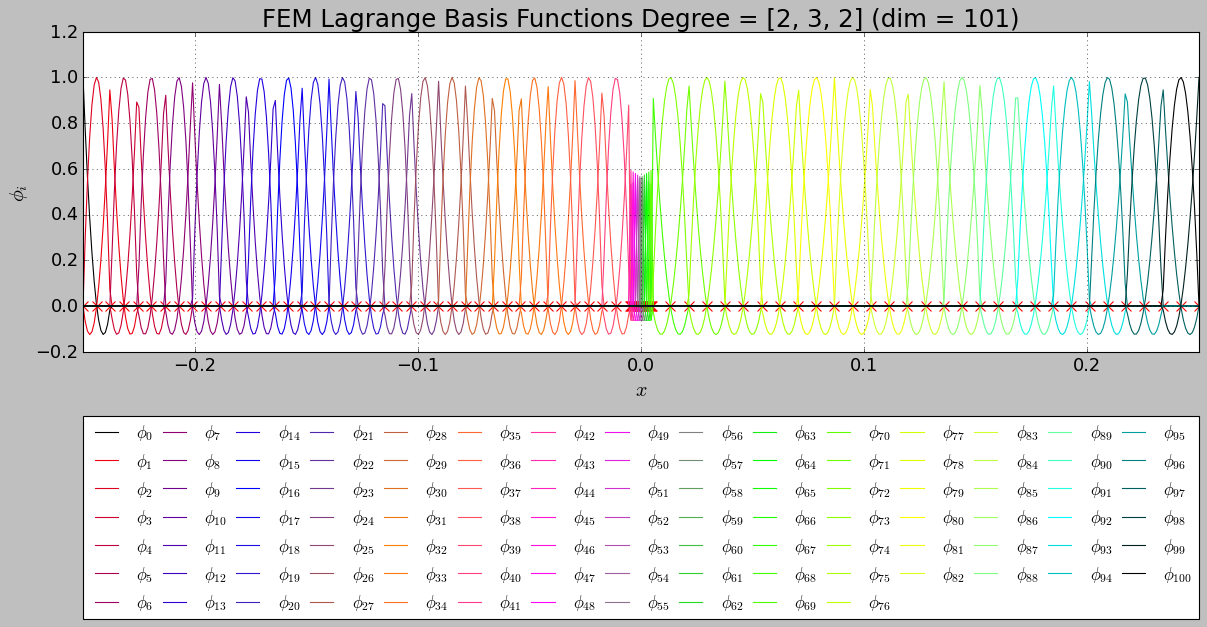

In [86]:
'''Build basis functions'''
from pyfem1d.toolkit import LagrangeFEMBasis 

degree = [2,3,2]
n_elem = [20,10,15] # make sure to use an odd number of element in the central source domain

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, -x_s, x_s, x_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) + 1/2\,\phi_j(a)\,\phi_i(a) + 1/2\,\phi_j(b)\,\phi_i(b) $

In [87]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'")
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v')

#r_mtrx_a = femlb.boundary_inner_product_matrix('left', lambda x:1/2, 'u', 'v') # incorrect left inner product fix (TODO)

import numpy as np
n = len(femlb.basis_func_list)
r_mtrx_a = np.zeros((n, n), dtype=np.float64)

for i,phi_i in enumerate(femlb.basis_func_list):
    for j,phi_j in enumerate(femlb.basis_func_list):
        r_mtrx_a[i,j] = 1/2 * phi_j(x_a)[0] * phi_i(x_a)[0] 

r_mtrx_b = femlb.boundary_inner_product_matrix('right', lambda x:1/2, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx + r_mtrx_a + r_mtrx_b

In [88]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

matrix is full rank.


  + $b_i = (s_0,\phi_i)$

In [89]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v')
b_vec = s_vec

In [90]:
'''Compute coefficients of the finite element basis linear combination'''
import numpy as np

c_star_vec = np.linalg.solve(a_mtrx, b_vec)

### [Results](#toc)<a id="results-vac"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

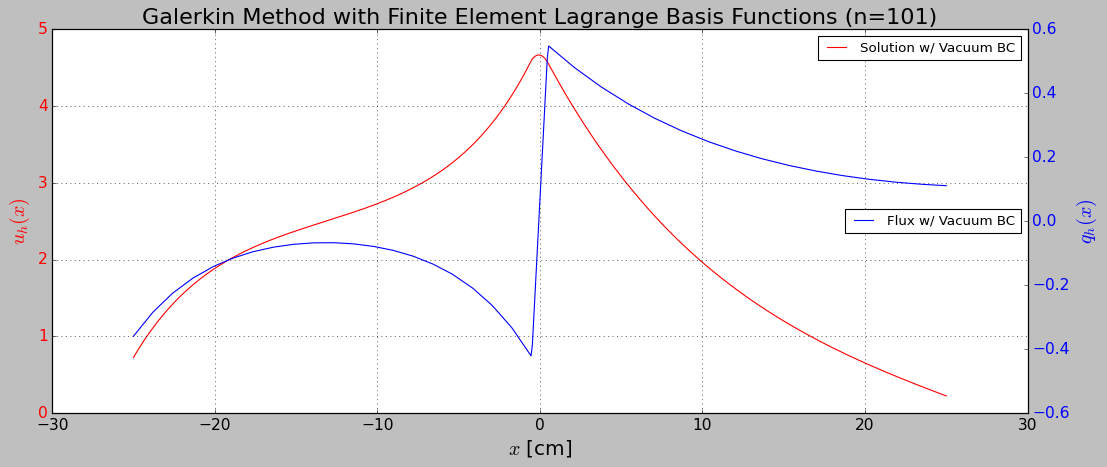

In [91]:
n_pts = 600
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)
q_values = -diffusion_coeff(x)*u_prime_star(x)

plot_solution(x, u_values, q_values, u_legend='Solution w/ Vacuum BC', q_legend='Flux w/ Vacuum BC')

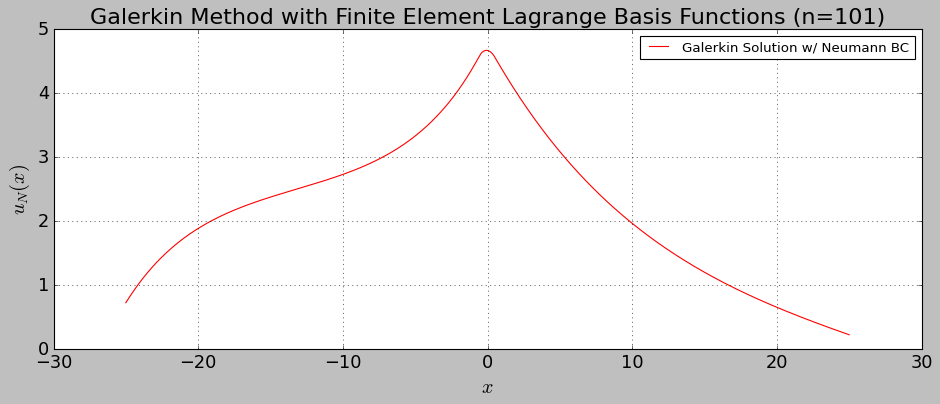

In [92]:
'''Rayleigh Ritz Method with Lagrange Basis Functions'''

n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)

import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')
plt.figure(1, figsize=(14, 5))

plt.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label='Galerkin Solution w/ Neumann BC')

plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$u_N(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [93]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N(a) [cm^2/s]= ', u_star(x_a)*unit.cm**2*unit.second, '  u^*_N(b) [cm^2/s]= ', u_star(x_b)*unit.cm**2*unit.second)
print("u^*'_N(a) [cm/s]= ", u_prime_star(x_a)*unit.cm*unit.second, " u^*'_N(b) [cm/s]= ", u_prime_star(x_b)*unit.cm*unit.second)
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N(a) [cm^2/s]=  [0.7233]   u^*_N(b) [cm^2/s]=  [0.22241]
u^*'_N(a) [cm/s]=  [3600.02392]  u^*'_N(b) [cm/s]=  [-793.02311]
u^*_N(0) [cm^2/s]=  [4.66504]
u^*'_N(0) [cm/s]=  [-414.43704]


In [94]:
'''Flux at left boundary'''

print('q_na given    [cm2/s]= ', u_star(x_a)/2*unit.cm**2*unit.second)
print('q_na computed [cm2/s]= ', -(-diffusion_coeff(x_a)*u_prime_star(x_a))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_na given    [cm2/s]=  [0.36165]
q_na computed [cm2/s]=  [0.36]


In [95]:
'''Flux at right boundary'''

print('q_nb given    [cm^2/s]= ', u_star(x_b)/2*unit.cm**2*unit.second)
print('q_nb computed [cm^2/s]= ', -diffusion_coeff(x_b)*u_prime_star(x_b)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_nb given    [cm^2/s]=  [0.1112]
q_nb computed [cm^2/s]=  [0.11102]


In [96]:
x_vec = np.linspace(x_a, x_b, 41)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
-2.50000e+01   +7.23298e-01     -3.60002e-01
-2.37500e+01   +1.12424e+00     -2.82108e-01
-2.25000e+01   +1.43876e+00     -2.21858e-01
-2.12500e+01   +1.68663e+00     -1.75488e-01
-2.00000e+01   +1.88340e+00     -1.40099e-01
-1.87500e+01   +2.04144e+00     -1.13481e-01
-1.75000e+01   +2.17068e+00     -9.39693e-02
-1.62500e+01   +2.27922e+00     -8.03456e-02
-1.50000e+01   +2.37390e+00     -7.17593e-02
-1.37500e+01   +2.46065e+00     -6.76754e-02
-1.25000e+01   +2.54494e+00     -6.78409e-02
-1.12500e+01   +2.63205e+00     -7.22691e-02
-1.00000e+01   +2.72745e+00     -8.12409e-02
-8.75000e+00   +2.83715e+00     -9.53223e-02
-7.50000e+00   +2.96803e+00     -1.15400e-01
-6.25000e+00   +3.12832e+00     -1.42738e-01
-5.00000e+00   +3.32808e+00     -1.79054e-01
-3.75000e+00   +3.57988e+00     -2.26634e-01
-2.50000e+00   +3.89952e+00     -2.88466e-01
-1.25000e+00   +4.30710e+00     -3.68436e-01
+0.00000e+00   +4.66504e+00     +6.21656e-02
+1.25000

In [97]:
x_vec/unit.cm

array([-25.  , -23.75, -22.5 , -21.25, -20.  , -18.75, -17.5 , -16.25,
       -15.  , -13.75, -12.5 , -11.25, -10.  ,  -8.75,  -7.5 ,  -6.25,
        -5.  ,  -3.75,  -2.5 ,  -1.25,   0.  ,   1.25,   2.5 ,   3.75,
         5.  ,   6.25,   7.5 ,   8.75,  10.  ,  11.25,  12.5 ,  13.75,
        15.  ,  16.25,  17.5 ,  18.75,  20.  ,  21.25,  22.5 ,  23.75,
        25.  ])

In [98]:
u_n_vec

array([0.7233 , 1.12424, 1.43876, 1.68663, 1.8834 , 2.04144, 2.17068,
       2.27922, 2.3739 , 2.46065, 2.54494, 2.63205, 2.72745, 2.83715,
       2.96803, 3.12832, 3.32808, 3.57988, 3.89952, 4.3071 , 4.66504,
       4.27695, 3.83802, 3.44182, 3.08409, 2.76095, 2.46863, 2.20382,
       1.96358, 1.74537, 1.54667, 1.36521, 1.19895, 1.04614, 0.90504,
       0.77403, 0.65162, 0.53652, 0.42745, 0.32314, 0.22241])

In [99]:
q_N_vec

array([-0.36   , -0.28211, -0.22186, -0.17549, -0.1401 , -0.11348,
       -0.09397, -0.08035, -0.07176, -0.06768, -0.06784, -0.07227,
       -0.08124, -0.09532, -0.1154 , -0.14274, -0.17905, -0.22663,
       -0.28847, -0.36844,  0.06217,  0.51786,  0.46682,  0.42067,
        0.38065,  0.34436,  0.31154,  0.28195,  0.25619,  0.23324,
        0.21264,  0.19422,  0.17822,  0.1644 ,  0.15223,  0.14161,
        0.13259,  0.12536,  0.11939,  0.11462,  0.11102])

In [100]:
'''Save text file with values'''

x_vec = np.linspace(x_a, x_b, 5000)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

np.savetxt('data/plane-source-unsym-vac.txt', (x_vec/unit.cm, u_n_vec, q_N_vec), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('line-source-inf.txt')